#BUDT 758J - Act11 DL

##Siddhant Soymon

In [1]:
# read Fashion MNist dataset
from tensorflow import keras

(data_train, out_train), (data_test, out_test) = keras.datasets.fashion_mnist.load_data()
data_train.shape, out_train.shape, data_test.shape, out_test.shape

4422102/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## Preprocessing

In [2]:
# transformation
in_train = data_train / 255.0
in_test = data_test / 255.0
in_train.min(), in_train.max(), in_test.min(), in_test.max()

(0.0, 1.0, 0.0, 1.0)

In [3]:
# EDA on out
# out_train.min(), out_train.max(), out_test.min(), out_test.max()
import numpy as np
np.unique(out_train), np.unique(out_test)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [4]:
class_names = {
    0 : 'T-shirt/top',
    1 : 'Trouser',
    2 : 'Pullover',
    3 : 'Dress',
    4 : 'Coat',
    5 : 'Sandal',
    6 : 'Shirt',
    7 : 'Sneaker',
    8 : 'Bag',
    9 : 'Ankle boot' }

print(class_names)

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


## Training Set

In [31]:
# define function to display images
import math
import matplotlib.pyplot as plt

def plot(images, labels, preds = None):
  n_cols = min(10, len(images))
  n_rows = math.ceil(len(images) / n_cols)
  fig, axes = plt.subplots(n_rows, n_cols, figsize = (n_cols + 3, n_rows + 2))
  if preds == None:
    predictions = [None] * len(labels)
  for index, (image, label, label_pred) in enumerate(zip(images, labels, predictions)):
    ax = axes.flat[index]
    ax.imshow(image, cmap = plt.cm.binary)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[label])
    if label_pred is not None:
      ax.set_xlabel(class_names[label_pred])

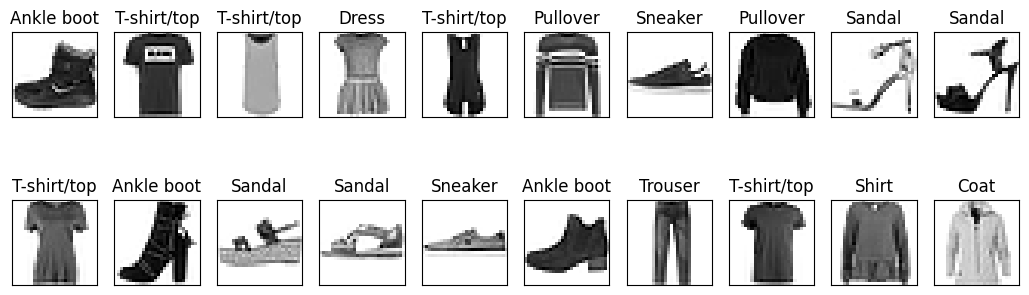

In [32]:
# display first 20 images in train set
plot(in_train[:20], out_train[:20])

## Model in Keras

In [19]:
model = keras.Sequential(layers = [
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(500, activation = 'sigmoid'),
    keras.layers.Dense(10, activation = 'softmax'),
    ])
#https://keras.io/api/optimizers/
#https://www.tensorflow.org/api_docs/python/tf/keras/losses
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(in_train, out_train, batch_size = 60, epochs = 10, validation_split = 0.2)

Epoch 1/10
800/800 [==============================] - 7s 8ms/step - loss: 0.5562 - accuracy: 0.8060 - val_loss: 0.4426 - val_accuracy: 0.8391
Epoch 2/10
800/800 [==============================] - 7s 9ms/step - loss: 0.4122 - accuracy: 0.8524 - val_loss: 0.4035 - val_accuracy: 0.8558
Epoch 3/10
800/800 [==============================] - 6s 7ms/step - loss: 0.3772 - accuracy: 0.8641 - val_loss: 0.3761 - val_accuracy: 0.8654
Epoch 4/10
800/800 [==============================] - 7s 8ms/step - loss: 0.3494 - accuracy: 0.8737 - val_loss: 0.3565 - val_accuracy: 0.8723
Epoch 5/10
800/800 [==============================] - 6s 8ms/step - loss: 0.3282 - accuracy: 0.8806 - val_loss: 0.3374 - val_accuracy: 0.8773
Epoch 6/10
800/800 [==============================] - 7s 9ms/step - loss: 0.3114 - accuracy: 0.8855 - val_loss: 0.3344 - val_accuracy: 0.8770
Epoch 7/10
800/800 [==============================] - 6s 7ms/step - loss: 0.2946 - accuracy: 0.8912 - val_loss: 0.3223 - val_accuracy: 0.8827
Epoch 

### model1 = ...
### model2 = ...
### model3 = ...
### model4 = ...
### model5 = ...
### \#In HW4, build four or more models
### \#determine the best
### model =

# Test Set

In [21]:
model.evaluate(in_test, out_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3450 - accuracy: 0.8792


[0.34498849511146545, 0.8791999816894531]

In [25]:
probs = model.predict(in_test)

313/313 [==============================] - 1s 2ms/step


In [27]:
preds = probs.argmax(axis = 1)
preds

array([9, 2, 1, ..., 8, 1, 5])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

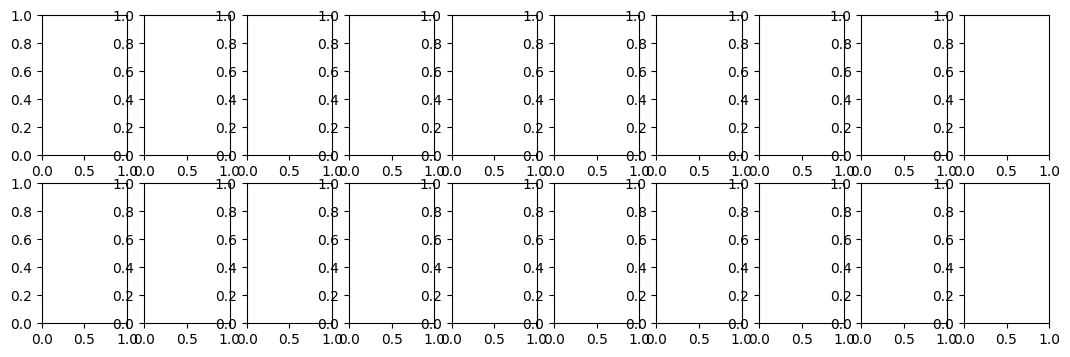

In [34]:
# display first 20 images in test set
plot(in_test[:20], out_test[:20], preds[:20])

interactive(children=(IntSlider(value=0, description='Image Index', layout=Layout(width='100%'), max=9999), Ou…

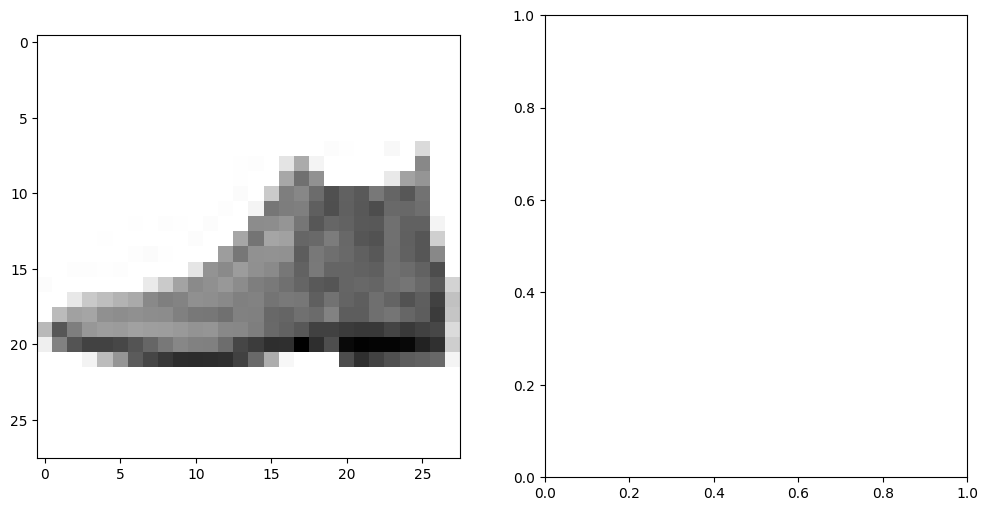

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import widgets, interact, Layout
img_idx_slider = widgets.IntSlider(value=0, min=0, max=len(in_test) - 1,
                                   description='Image Index',
                                   layout=Layout(width='100%'))
@interact(index=img_idx_slider)
def visualize_prediction(index=0):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.imshow(in_test[index], cmap=plt.cm.binary)
    ax1.set_title(f'Label: {label_names[out_test[index]]}')
    ax1.xaxis.tick_top()
    ax1.set_xlabel(f'Predict: {label_names[preds[index]]}')
    ax1.set_ylabel('Pixel Location Index')
    ax1.set_xticks(range(28))
    ax1.set_yticks(range(28))
    ax1.tick_params(axis='x', labelrotation=90)
    bar = sns.barplot(y=[label_names[ind] for ind in range(10)],
                      x=probs[index]*100)
    bar.set_xlim(0, 100)
    bar.set_xlabel('Probability (%)')
    bar.set_ylabel('Prediction Label')
    bar.set_title('Prediction Probabilities')
    fig.tight_layout()
    plt.show()